**<font color = black size=6>实验七:聚类</font>**

In [1263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
import warnings
import random
warnings.filterwarnings('ignore')
from pandas.core.frame import DataFrame
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

**<font color = blue size=4>第一部分:实验任务</font>**

本任务使用train.csv数据集，共有二维特征【weight】,【height】.本次实验检测使用二类聚类算法: 原型聚类法【K-means】和密度聚类法【DBSCAN】.

1)对该数据集进行聚类处理

2)聚类完成后进行可视化处理

由于层次聚类法计算量大，复杂度高，本次实验任务不做要求，感兴趣的同学可以自行实现。

<span style="color:purple">1.首先编写计算衡量样本间的相似度的距离，这里列举两种距离公式.之后的任务中从两个距离公式中选择一种使用，但需要保证两个任务要使用同样的距离公式</span>
    
<span style="color:purple">a.曼哈顿距离计算公式:  
    对于两个d维的样本$x_i$,$x_j$,他们的曼哈顿距离计算公式为:  
    $$dist_{man}(x_i,x_j)=\sum_{u=1}^d |x_{iu}-x_{ju}|$$
其中$x_{iu}$和$x_{ju}$分别为样本$x_i$和$x_j$的第u维特征值</span>

<span style="color:purple">b.欧式距离计算公式:  
    对于两个d维的样本$x_i$,$x_j$,他们的欧式距离计算公式为:  
    $$dist_{ed}(x_i,x_j)=\sqrt{\sum_{u=1}^d (x_{iu}-x_{ju})^2}$$
其中$x_{iu}$和$x_{ju}$分别为样本$x_i$和$x_j$的第u维特征值</span>

In [1264]:
#曼哈顿距离
def manhattan_distance(x, y):
    
    return np.sum(np.abs(x-y))

#欧式距离
def euclidean_distance(x,y):
    return np.sqrt(np.sum((x-y)**2)) 

**<font color = green size=3>1):常用聚类算法一: 原型聚类法</font>**

使用K-means算法对数据集进行聚类处理，具体逻辑参照下面图片所给的伪代码

In [1265]:
%%html
<img src="K_means Pseudocode.png", width=720, heigth=240>

<span style="color:purple">1) 确定聚类数量$k$，然后从数据集D中随机选取$k$个样本作为初始均值向量$$\{\mu_1,\mu_2,...,\mu_{k}\}$$</span>


In [1266]:
#加载数据集
dataframe = pd.read_csv('train.csv')
data = np.array(dataframe)

#聚类数量
# 后续定义好k-means函数之后 根据肘部法则进行选取
k =3


# #随机选取k个样本作为初始均值向量
# initial_centroids = dataframe.sample(n=k, random_state=42)
# mu = initial_centroids.values 

# print(mu)
# #初始化各个聚类集合
# clusters = {i: [] for i in range(k)}


# 定义均值向量初始化函数 
def initialize_centroids(dataframe, k):
    initial_centroids = dataframe.sample(n=k, random_state=42)
    mu = initial_centroids.values
    # 返回numpy矩阵形式的均值向量
    return mu
# print(type(initialize_centroids(dataframe,3)))


<span style="color:purple">2)开始进行迭代。每一轮更新均值向量，直到均值向量不再变化则停止迭代</span>

<span style="color:purple">迭代步骤1).遍历每个样本$x_j$,计算其与当前的各个均值向量$\mu_i$的距离$d_{ji}$，比较与每个均值向量的距离大小:
   $$\lambda_j=arg min_{i \in \{1,2,...,k\}}d_{ji}$$
   将其划入与其距离最近的簇中,
   $$C_{\lambda_j}=C_{\lambda_j}\bigcup{x_j}$$</span>
<span style="color:purple">迭代步骤2).将所有样本划分完成生成k个簇$\{C_1,C_2,...,C_k\}$。对于每个簇$C_i$，计算该簇的新均值向量，公式为:
$$\mu_i^{'}=\frac{1}{|C_i|}\sum_{x \in C_i}x$$</span>
<span style="color:purple">迭代步骤3).将更新的均值向量$\{\mu_1^{'},\mu_2^{'},...,\mu_k^{'}\}$与该轮未更新前的均值向量$\{\mu_1,\mu_2,...,\mu_k\}$进行比较.  如果完全一样，则结束迭代；如果不一样，则继续迭代.</span>

In [1267]:
# 比较均值向量是否相同
def equallist(x,y):
    return np.array_equal(x,y)

# 将整个过程封装为K-means函数 
def k_means(dataframe, k, distance_function=euclidean_distance):
    # 初始化均值向量
    centroids = initialize_centroids(dataframe, k)
    # 初始化为0  后续用来进行比较
    prev_centroids = np.zeros_like(centroids) 
    # 迭代过程
    while True:

        # 初始化 创建一个空的字典来存储每个簇的样本
        clusters = {i: [] for i in range(k)}
        # print(type(clusters))

        # 遍历每个样本
        for x in np.array(dataframe):
            # 计算样本与k个聚类的簇心的距离
            distances = [distance_function(x, centroid) for centroid in centroids]
            # 找到距离最小的均值向量对应的簇
            # print(distances)
            cluster_index = np.argmin(distances)
            # print(cluster_index)
            # 将样本划分到该簇中
            clusters[cluster_index].append(x)

        # 更新这轮迭代的簇心
        for i in range(k):
            if len(clusters[i]) > 0:  # 防止空簇
                centroids[i] = np.mean(clusters[i], axis=0)

        # 判断均值向量是否发生变化
        if np.array_equal(centroids, prev_centroids):
            break
        # 使用copy保存当前均值向量 防止被修改 要使用copy
        prev_centroids = centroids.copy()
    # 返回均值向量(簇心)和样本划分的结果
    return centroids, clusters
k=3
centroids,clusters=k_means(dataframe,k)

# 输出划分的聚类情况
print(clusters)


{0: [array([ 60.93086317, 170.28449577]), array([ 59.73384301, 168.6919918 ]), array([ 61.57716033, 168.09175124]), array([ 63.34186626, 170.64251603]), array([ 61.04164336, 170.09668166]), array([ 62.63362335, 171.86297157]), array([ 62.93820031, 168.71007855]), array([ 65.1630426 , 171.17658204]), array([ 60.65937349, 170.64765908]), array([ 59.17655435, 169.19080975]), array([ 60.6270339 , 169.84811911]), array([ 60.35999202, 169.89078752]), array([ 59.85687102, 168.85468537]), array([ 64.59160046, 170.06283827]), array([ 60.44702902, 170.00817842]), array([ 62.73255209, 169.10528593]), array([ 62.62977223, 167.66272215]), array([ 64.44201493, 169.69123426]), array([ 64.51477257, 169.34934976]), array([ 63.88109247, 170.41715746]), array([ 62.47848649, 169.00766364]), array([ 62.28600868, 170.77442958]), array([ 62.38717375, 172.45294212]), array([ 59.35486355, 168.57199985]), array([ 64.38072382, 169.83116828]), array([ 62.61540394, 171.84082283]), array([ 60.98457787, 170.64963222

<span style="color:purple">3)判断是否有空簇,返回所有非空的簇,空簇丢弃</span>

In [1268]:
#your code here

# 将字典中的空簇丢弃
def get_non_empty_clusters(clusters):
    non_empty_clusters_values = {}
    # 遍历原有的簇心向量和相应的样本划分列表
    for key, value in clusters.items():
        # 如果簇非空
        if len(value) > 0:  
            non_empty_clusters_values[key] = value
    return non_empty_clusters_values

clusters= get_non_empty_clusters(clusters)
print(clusters)
# print(type(clusters))

{0: [array([ 60.93086317, 170.28449577]), array([ 59.73384301, 168.6919918 ]), array([ 61.57716033, 168.09175124]), array([ 63.34186626, 170.64251603]), array([ 61.04164336, 170.09668166]), array([ 62.63362335, 171.86297157]), array([ 62.93820031, 168.71007855]), array([ 65.1630426 , 171.17658204]), array([ 60.65937349, 170.64765908]), array([ 59.17655435, 169.19080975]), array([ 60.6270339 , 169.84811911]), array([ 60.35999202, 169.89078752]), array([ 59.85687102, 168.85468537]), array([ 64.59160046, 170.06283827]), array([ 60.44702902, 170.00817842]), array([ 62.73255209, 169.10528593]), array([ 62.62977223, 167.66272215]), array([ 64.44201493, 169.69123426]), array([ 64.51477257, 169.34934976]), array([ 63.88109247, 170.41715746]), array([ 62.47848649, 169.00766364]), array([ 62.28600868, 170.77442958]), array([ 62.38717375, 172.45294212]), array([ 59.35486355, 168.57199985]), array([ 64.38072382, 169.83116828]), array([ 62.61540394, 171.84082283]), array([ 60.98457787, 170.64963222

<span style="color:purple">4)将数据集的二维特征值作为绘图的横纵坐标，将所有样本绘制到一张图中，其中同一聚类的样本点绘制为相同颜色</span>

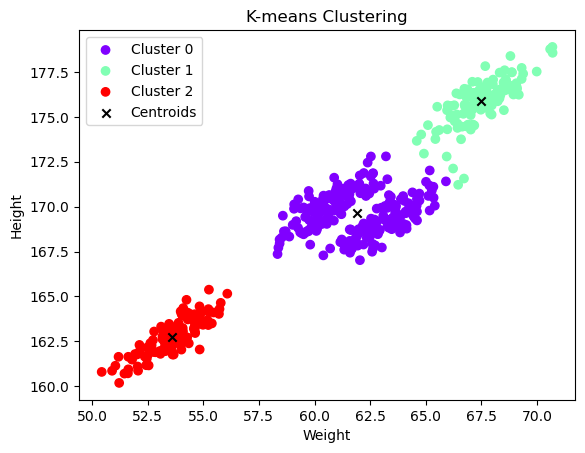

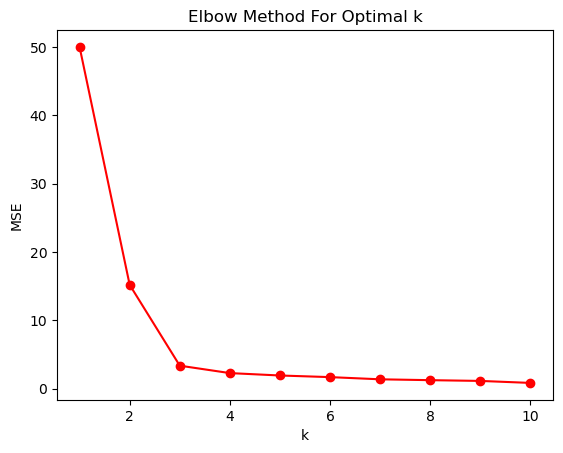

In [1269]:
#your code here

def plot_kmeans_clusters(dataframe, centroids, clusters):
    # 根据生成等距间隔的数字来选取颜色
    colors = plt.cm.rainbow(np.linspace(0, 1, len(centroids)))

    # 绘制每个簇的数据点
    for i, color in enumerate(colors):
        if i in clusters:
            x_i = [point[0] for point in clusters[i]]
            y_i = [point[1] for point in clusters[i]]
            plt.scatter(x_i, y_i, c=[color]*len(clusters[i]), label=f"Cluster {i}")

    # 绘制簇心
    x_centroids = [centroid[0] for centroid in centroids]
    y_centroids = [centroid[1] for centroid in centroids]
    plt.scatter(x_centroids, y_centroids, c='black', marker='x', label='Centroids')

    plt.legend()
    plt.title("K-means Clustering")
    plt.xlabel(dataframe.columns[0])
    plt.ylabel(dataframe.columns[1])
    plt.show()

# 使用函数绘制聚类和簇心
plot_kmeans_clusters(dataframe, centroids, clusters)


# # 定义函数 计算簇中心和簇的平方误差
# # 也可以再进行平均操作计算均方误差 但是这不影响肘部法则的判别
# def compute_ssd(centroids, clusters):
#     ssd = 0 
#     for cluster_id, points in clusters.items():
#         # 遍历对应簇的全部划分样本
#         for point in points:
#             ssd += np.sum(euclidean_distance(point,centroids[cluster_id]) ** 2)
#     # 返回簇划分的平方误差
#     return ssd

# 定义函数 计算簇中心和簇的均方误差
def compute_mse(centroids, clusters):
    total_points = sum([len(points) for points in clusters.values()]) # 获取全部样本的数量 后续用于取平均计算MSE
    ssd = 0 # 初始化平方误差为0
    for cluster_id, points in clusters.items():
        # 遍历对应簇的全部划分样本
        for point in points:
            ssd += np.sum(euclidean_distance(point, centroids[cluster_id]) ** 2)
    # 返回均方误差
    return ssd / total_points

# 定义函数 绘制肘部曲线 用来选择合适的k值
def elbow_method(dataframe, max_k=10):
    # 存储对应k值的均方误差MSE的列表
    mse_list = []

    # 对于每个k值进行k-means并计算簇划分的均方误差
    for k in range(1, max_k+1):
        centroids, clusters = k_means(dataframe, k)
        mse = compute_mse(centroids, clusters)
        mse_list.append(mse)
    
    # 绘制k值与均方误差的关系图 根据肘部法则找到肘点
    plt.plot(range(1, max_k+1), mse_list,'ro-')
    plt.xlabel('k')
    plt.ylabel('MSE')
    plt.title('Elbow Method For Optimal k')
    plt.show()

# 使用数据调用上述函数
elbow_method(dataframe)
# 根据肘部法则 最终选取k=3

**<font color = green size=3>2):常用聚类算法二: 密度聚类法</font>**

本任务依然使用train.csv数据集，使用DBSCAN算法对数据集进行聚类处理，具体逻辑参照"图片2:DBSCAN伪代码"中的伪代码

<span style="color:purple">1)首先编写函数,根据“邻域”参数（epsilon,MinPts），输出该样本的领域对象的样本索引列表.    
    【输入】：输入数据集D、当前样本的索引index、 邻域半径epsilon   
    【输出】：该样本的邻域对象的样本索引列表</span>

In [1270]:
def get_neighbors(D, index, epsilon, distance_function=euclidean_distance):
    neighbors=[] # 初始化index样本的邻域对象的样本索引列表
    # 遍历所有样本
    for i,sample in enumerate(D):
        # 如果样本与当前样本的距离小于等于邻域半径epsilon,则将其加入邻域内
        if i!=index and distance_function(sample,D[index])<=epsilon:
            neighbors.append(i)
    # 返回该样本的邻域对象的样本索引列表
    return neighbors

<span style="color:purple">2)编写函数,根据“邻域”参数（epsilon,MinPts），输出数据集D的所有的核心对象.    
    【输入】：输入数据集D、当前样本的索引index、邻域参数（epsilon,MinPts）   
    【输出】：该数据集D的所有的核心对象</span>

In [1271]:
def core_set(D,epsilon,MinPts, distance_function=euclidean_distance):
    # 初始化核心对象集合
    core_objects = []

    # 对每个样本进行遍历
    for i in range(len(D)):
        # 获取邻域内的所有样本的索引
        neighbors = get_neighbors(D, i, epsilon,distance_function)
        # 如果邻域内的样本数量大于等于最小样本数MinPts，则将当前样本标记为核心对象
        if len(neighbors) >= MinPts:
            # 将该索引添加到核心对象集合中  即将当前样本标记为核心对象
            core_objects.append(i)
    # 返回数据集D的所有核心对象(索引)
    return core_objects

<span style="color:purple">3)遍历核心对象集合中的所有元素，直至所有核心对象被访问,具体逻辑参照下面图片的伪代码</span>

In [1272]:
%%html
<img src="DBSCAN Pseudocode.png", width=720, heigth=240>

500


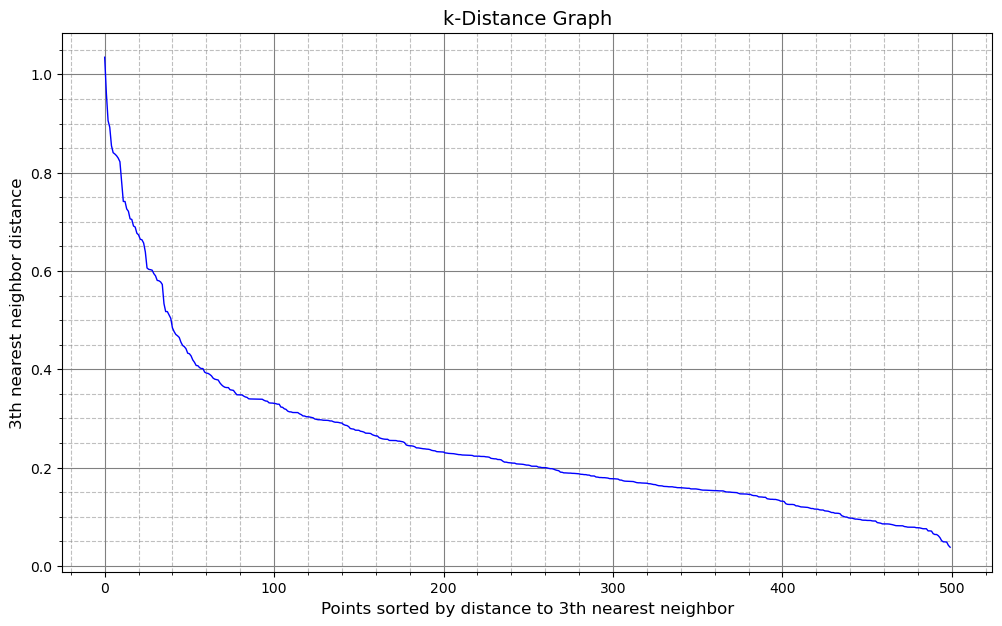

In [1273]:
#初始化参数epsilon,MinPts
print(len(dataframe))

D= np.array(dataframe)
epsilon=0.75
MinPts=10

def dbscan(D,epsilon,MinPts, distance_function=euclidean_distance):
    # 初始化标签数组，0表示未分类
    labels = [0]*len(D)

    # 生成核心对象集合
    core_objects=core_set(D,epsilon,MinPts,distance_function)
    print(len(core_objects))
    # 定义当前簇的标签
    current_cluster_label = 0

    # 对核心对象集合进行遍历
    for index in core_objects:
        
        # 如果核心对象已经分类，则跳过
        if labels[index]!=0:
            continue

        # 创建一个新的簇
        current_cluster_label+=1
        # 将核心对象标记为该簇
        labels[index]=current_cluster_label

        # # 获取由核心对象密度直达的样本集合Δ
        # Δ=get_neighbors(D,index,epsilon)
        # # 遍历样本集合Δ
        # i=0
        # while i<len(Δ):
            
        #     # 取出一个样本
        #     neighbor_index=Δ[i]

        #     # 如果样本已经分类，则跳过
        #     if labels[neighbor_index]!=0:
        #         i+=1
        #         continue
            
        #     # 将样本标记为当前簇
        #     labels[neighbor_index]=current_cluster_label

        #     # 获取由样本密度直达的样本集合Δ'
        #     Δ_prime =get_neighbors(D,neighbor_index,epsilon)

        #     # 如果样本是核心对象，则将Δ'中的样本加入Δ
        #     if len(Δ_prime) >= MinPts:
        #         Δ += Δ_prime
        #     i+=1
         
        # 获取由核心对象密度直达的样本集合Δ
        Δ = get_neighbors(D, index, epsilon,distance_function)

        # 遍历样本集合Δ
        while Δ:
            
            # 取出一个样本
            neighbor_index =Δ.pop(0)
            
            # 如果样本已经分类，则跳过
            if labels[neighbor_index]!=0:
                continue
            # 没有跳过 则说明样本未被分类    
            # 将样本标记为当前簇
            labels[neighbor_index] = current_cluster_label
            
            # 获取由样本密度直达的样本集合Δ'
            Δ_prime = get_neighbors(D, neighbor_index, epsilon,distance_function)
            
            # 如果样本是核心对象，则将Δ'中的样本加入Δ
            if len(Δ_prime) >= MinPts:
                Δ.extend(Δ_prime)
    # 返回对应每个样本的簇类别的列表
    return labels

from sklearn.neighbors import NearestNeighbors
def estimate_epsilon(data, k):
     # 计算第k近邻的距离
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(data)
    distances, _ = knn.kneighbors(data)
    
    # 取每个点的kth近邻的距离
    k_distances = distances[:, k-1]
    
    # 排序距离
    sorted_k_distances = np.sort(k_distances)[::-1]  # 从大到小排序

    # 绘制k-距离图
    plt.figure(figsize=(12, 7))
    plt.plot(sorted_k_distances, 'b-', lw=1)
    
    # 添加网格
    plt.minorticks_on()
    plt.grid(b=True, which='major', color='gray', linestyle='-')
    plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.5)
    
    plt.xlabel('Points sorted by distance to %dth nearest neighbor' % k, fontsize=12)
    plt.ylabel('%dth nearest neighbor distance' % k, fontsize=12)
    plt.title('k-Distance Graph', fontsize=14)
    A
    # 添加坐标轴的坐标标签
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.show()
# 根据算法 选取的k值为3
estimate_epsilon(D,3)


<span style="color:purple">4)将数据集的二维特征值作为绘图的横纵坐标，将所有样本绘制到一张图中，其中同一聚类的样本点绘制为相同颜色</span>

410
390
391


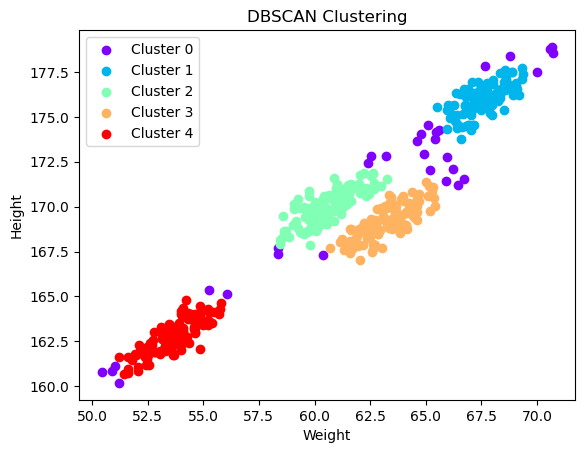

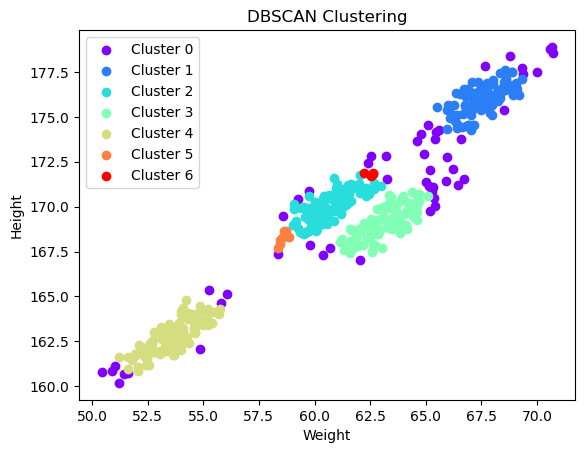

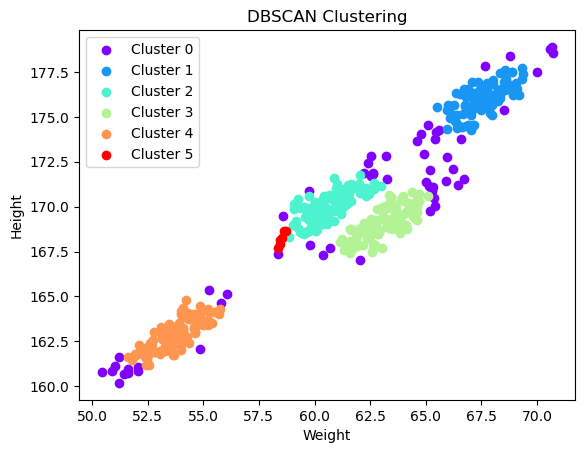

In [1274]:
# your code here

def plot_dbscan_clusters(dataframe, labels):
    # 为每个聚类分配一个颜色
    unique_labels = set(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

    for label, color in zip(unique_labels, colors):
        # 对于每一个簇，找到属于它的数据点
        cluster_indices = np.where(np.array(labels) == label)
        cluster_data = dataframe.iloc[cluster_indices]

        # 绘制簇的数据点
        plt.scatter(cluster_data[dataframe.columns[0]], cluster_data[dataframe.columns[1]], 
                    c=[color], label=f"Cluster {label}")

    plt.legend()
    plt.title("DBSCAN Clustering")
    plt.xlabel(dataframe.columns[0])  # 将第一列特征值作为x轴
    plt.ylabel(dataframe.columns[1])  # 将第二列特征值作为y轴
    plt.show()

labels=dbscan(D,epsilon,MinPts)
labels2=dbscan(D,0.5,5)
labels3=dbscan(D,0.55,6)
# 使用上面定义的DBSCAN代码得到的labels调用此函数
plot_dbscan_clusters(dataframe, labels)
plot_dbscan_clusters(dataframe, labels2)
plot_dbscan_clusters(dataframe, labels3)


**<font color = blue size=4>第二部分:作业提交</font>**

一、实验课下课前提交完成代码，如果下课前未完成，请将已经完成的部分进行提交，未完成的部分于之后的实验报告中进行补充  
要求:  
1)文件格式为：学号-姓名.ipynb  
2)【不要】提交文件夹、压缩包、数据集等无关文件，只需提交单个ipynb文件即可，如果交错请到讲台前联系助教，删掉之前的错误版本后再进行提交

二、本次实验报告下周（11.3 14:20）交  
要求：  
1)文件格式为：学号-姓名.pdf  
2)【不要】提交文件夹、压缩包、代码文件、数据集等任何与实验报告无关的文件，只需要提交单个pdf文件即可  
3)文件命名时不需要额外添加“实验几”等额外信息，按照格式提交  
4)每周的实验报告提交地址会变化，且有时间限制，提交时间为下周的实验课开始时，请注意及时提交。

实验七(聚类)的实验报告:  
截止时间：2023-11-3 14:20  
提交地址：https://send2me.cn/iELj8D1c/SQ2D4iOn-q0vHQ

三、课堂课件获取地址:https://www.jianguoyun.com/p/DU6WTlcQp5WhChiKxZkFIAA  
实验内容获取地址:https://www.jianguoyun.com/p/DTeJc2sQp5WhChiv96IFIAA